In [257]:
using StatsPlots, Plots, Measures
using Distributions
using Statistics, StatsBase
using CSV, DataFrames
using Dates
using LsqFit
using HypothesisTests
using LaTeXStrings
using Plots.PlotMeasures
# using SingularSpectrumAnalysis
using ARCHModels

In [258]:
df_acf_pacf = CSV.read("data/acf_pacf_data.csv", DataFrame)

,lag,up_acf,down_acf,up_pacf,down_pacf
,Int64,Float64,Float64,Float64,Float64
1,0,1.0,1.0,1.0,1.0
2,1,0.754505,0.716567,0.754505,0.716567
3,2,0.00419306,-0.0482656,0.00419306,-0.0482656
4,3,0.0579789,0.00558425,0.0579789,0.00558425
5,4,0.0512803,-0.000953262,0.0512803,-0.000953262
6,5,0.050307,-0.00170428,0.050307,-0.00170428
7,6,0.0470819,-0.00350149,0.0470819,-0.00350149
8,7,0.0471309,-0.0042989,0.0471309,-0.0042989
9,8,0.0447122,-0.00595525,0.0447122,-0.00595525


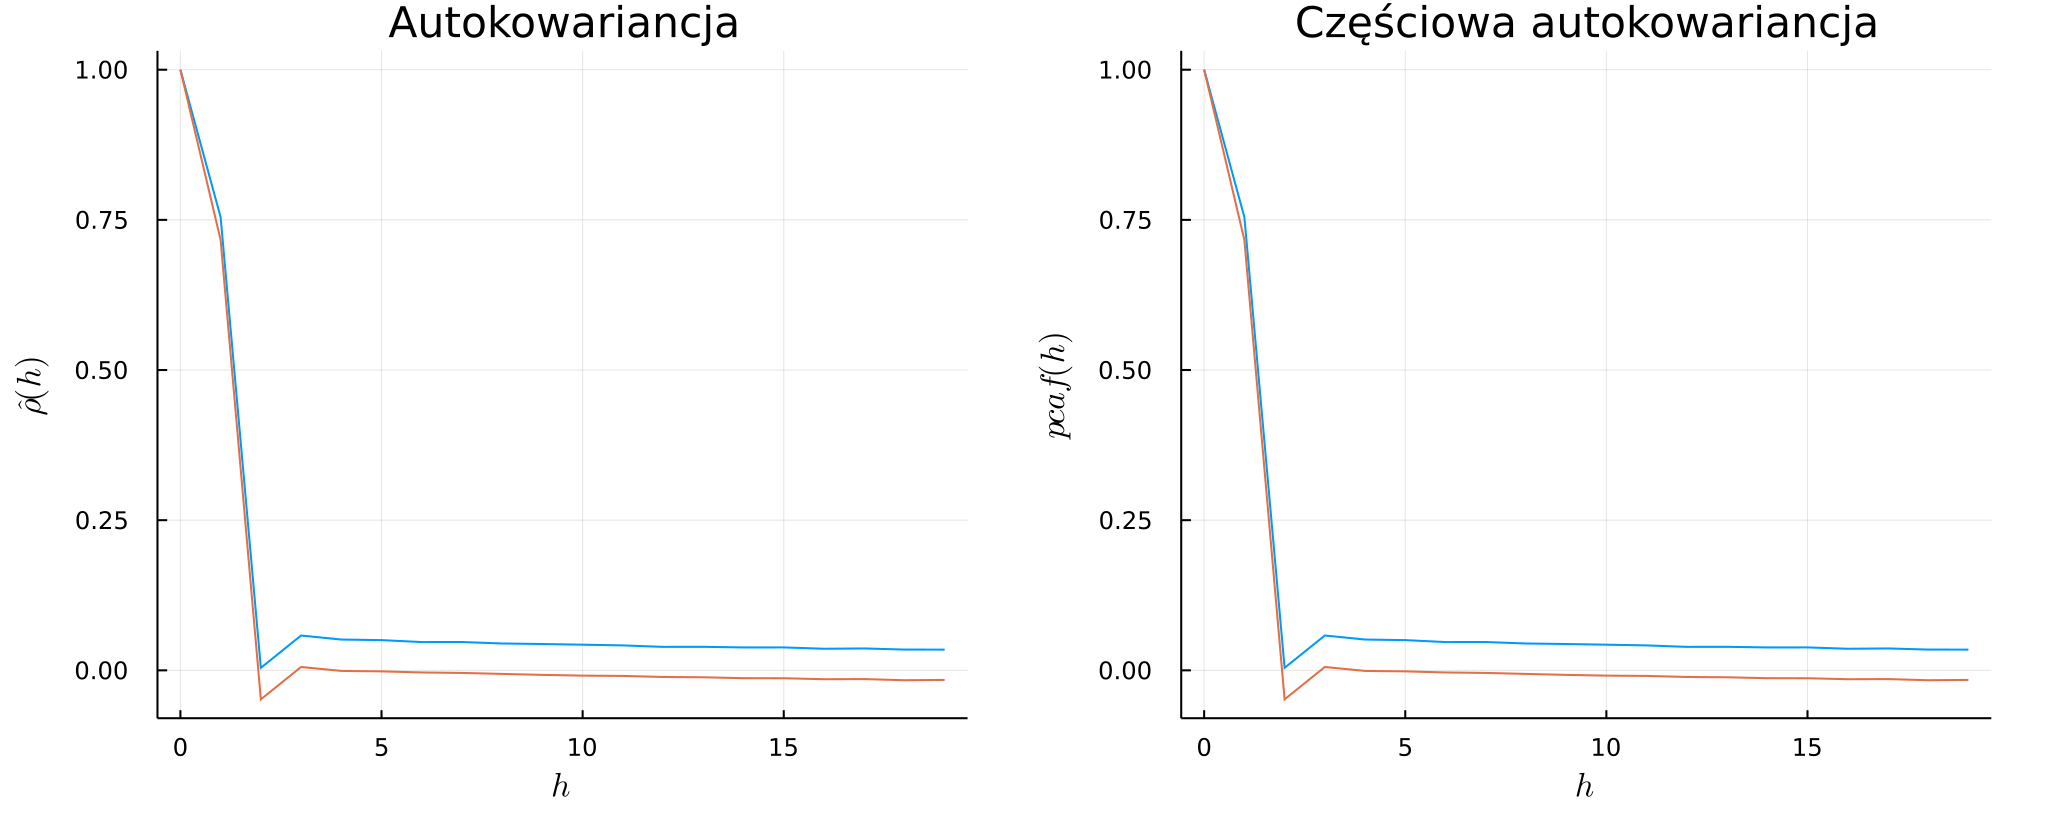

In [259]:
a = plot(df_acf_pacf.lag[1:20] , df_acf_pacf.up_acf[1:20],dpi=500)
plot!(df_acf_pacf.lag[1:20] , df_acf_pacf.down_acf[1:20])
plot!(leg=false,title="Autokowariancja",ylabel=L"$\hat{\rho}(h)$", xlabel=L"$h$")
b = plot(df_acf_pacf.lag[1:20] , df_acf_pacf.up_pacf[1:20],leg=false,dpi=500,title="Częściowa autokowariancja",ylabel=L"pcaf(h)", xlabel=L"$h$")
plot!(df_acf_pacf.lag[1:20] , df_acf_pacf.down_pacf[1:20],leg=false)
plot(a,b,size=(1000,400),bottom_margin=5mm, left_margin=5mm, right_margin=5mm)


In [260]:
savefig(plot!(),"tex_Maciej/img/acf_pacf.png")

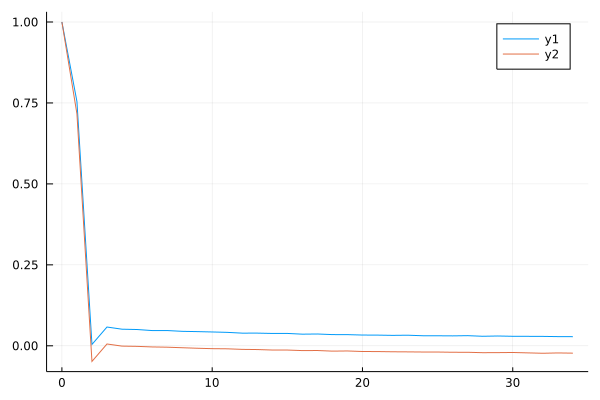

In [261]:
plot(df_acf_pacf.lag , df_acf_pacf.up_pacf)
plot!(df_acf_pacf.lag , df_acf_pacf.down_pacf)

In [262]:
df_samples_quantails = CSV.read("data/samples_quantails.csv", DataFrame)

,orginal,sample_09,sample_01,sample_095,sample_005
,Float64,Float64,Float64,Float64,Float64
1,-1.25,2.57131,-2.82266,3.35959,-3.60451
2,-1.625,3.2403,-3.41441,4.12828,-4.35636
3,-0.0892857,3.57594,-3.73289,4.58323,-4.75414
4,0.291667,3.71643,-3.76627,4.79439,-4.85031
5,2.07143,3.79502,-3.89497,4.88339,-4.97065
6,0.25,3.77967,-3.85555,4.83116,-4.8708
7,1.875,3.75245,-3.83997,4.87725,-4.96147
8,6.5,3.86303,-3.87783,4.90676,-4.97766
9,6.75,3.83553,-3.88216,4.85019,-5.02119


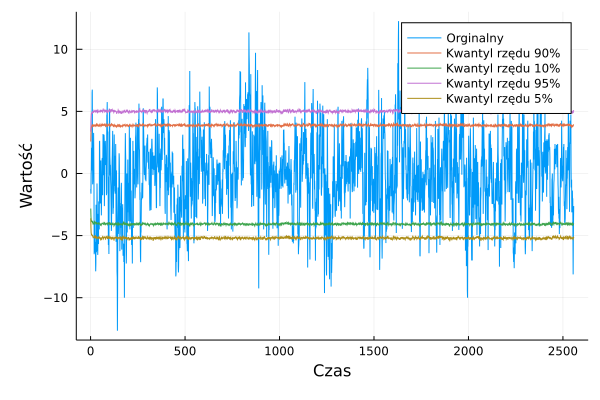

In [263]:
plot(df_samples_quantails.orginal, label = "Orginalny",bottom_margin=5mm, left_margin=5mm)
plot!(df_samples_quantails.sample_09, label = "Kwantyl rzędu 90%")
plot!(df_samples_quantails.sample_01, label = "Kwantyl rzędu 10%")
plot!(df_samples_quantails.sample_095, label = "Kwantyl rzędu 95%")
plot!(df_samples_quantails.sample_005, label = "Kwantyl rzędu 5%")
plot!(xlabel= "Czas",ylabel="Wartość",legend=:best)

In [264]:
savefig(plot!(), "tex_Maciej/img/linie_kwantylowe.png")

In [265]:
mean(df_samples_quantails.sample_09 .> df_samples_quantails.orginal .> df_samples_quantails.sample_01 )

0.8044583496284708

In [266]:
mean(df_samples_quantails.sample_095 .> df_samples_quantails.orginal .> df_samples_quantails.sample_005 )

0.8932342588971451

In [267]:
File=CSV.read("data/residua.csv", DataFrame);
File

,Residua
,Float64
1,-1.15538
2,-0.67737
3,1.13468
4,0.350854
5,1.92554
6,-1.22747
7,1.8405
8,5.13403
9,1.98817


In [268]:
residua = File.Residua

2557-element Vector{Float64}:
 -1.1553844081691207
 -0.6773699164762972
  1.1346801980690369
  0.3508535806833218
  1.9255353955576027
 -1.2274705288975787
  1.8404956706086983
  5.134025534289041
  1.98817293111461
 -1.638621856336818
 -2.9795639799577263
  0.05357146497687193
  1.1797375051775867
  ⋮
 -0.23535180957619162
 -2.9059413341215135
 -0.4253862440299616
 -1.157906137418774
  0.5945165329804645
 -1.3904161145379532
 -0.3895574016972523
 -3.6097312375823956
 -4.4566694738163495
  0.632328695693329
 -0.23576234133240348
  0.1899477824103526

## Założenie o wartości średniej

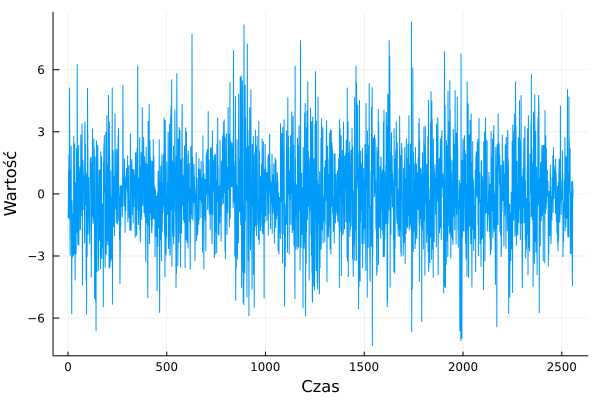

In [269]:
plot(residua,leg=false,xlabel="Czas",ylabel="Wartość")

In [270]:
savefig(plot!(),"tex_Maciej/img/residua.png")

In [271]:
OneSampleTTest(residua)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.000791916
    95% confidence interval: (-0.08009, 0.08167)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9847

Details:
    number of observations:   2557
    t-statistic:              0.019200134473658807
    degrees of freedom:       2556
    empirical standard error: 0.04124531616232871


## Założenie o równej wariancji 

wykres  jakm wyżej

In [272]:
# LeveneTest(residua)
ARCHLMTest(residua, 255)

ARCH LM test for conditional heteroskedasticity
-----------------------------------------------
Population details:
    parameter of interest:   T⋅R² in auxiliary regression
    value under h_0:         0
    point estimate:          390.809

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-07

Details:
    sample size:                    2557
    number of lags:                 255
    LM statistic:                   390.809


## Założenie o niezależności 

In [273]:
df_residua_acf_pacf = CSV.read("data/residua_acf_pacf.csv", DataFrame);

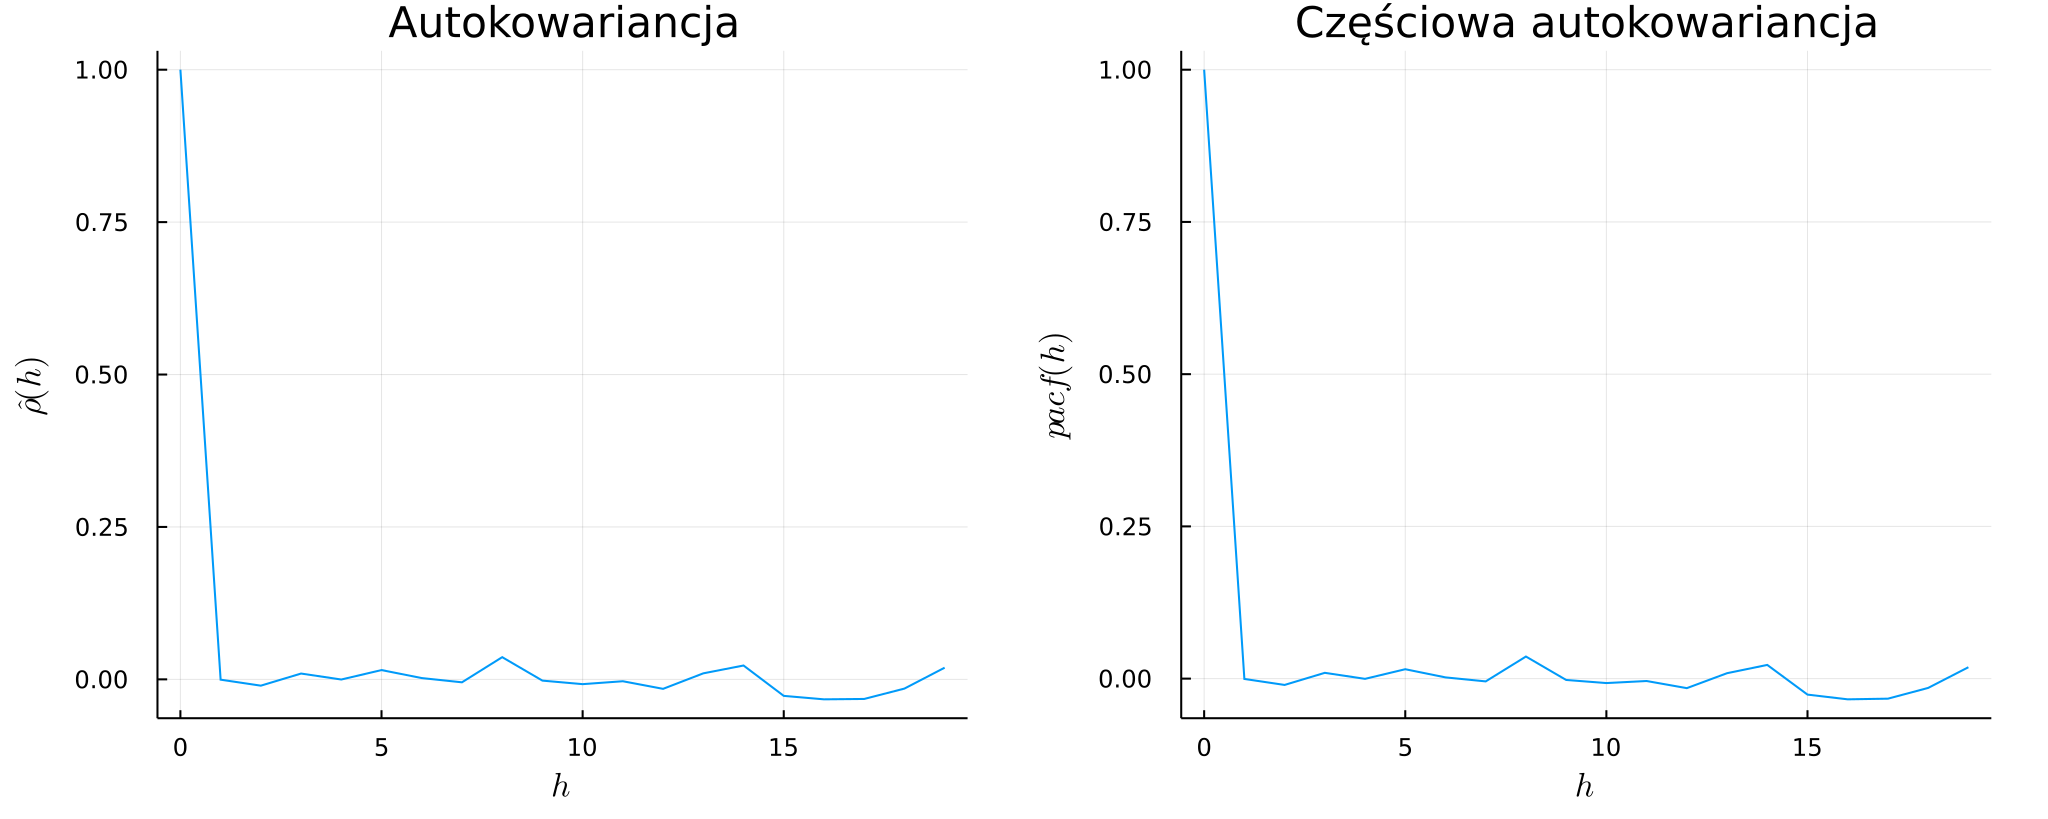

In [274]:
plot(df_residua_acf_pacf.lag[1:20], df_residua_acf_pacf.acf[1:20],leg=false,dpi=500,title="Autokowariancja",ylabel=L"$\hat{\rho}(h)$", xlabel=L"$h$")
a = plot!()
plot(df_residua_acf_pacf.lag[1:20], df_residua_acf_pacf.pacf[1:20],leg=false,dpi=500,title="Częściowa autokowariancja",ylabel=L"pacf(h)", xlabel=L"$h$")
b=plot!()
plot(a,b,size=(1000,400),bottom_margin=5mm, left_margin=5mm, right_margin=5mm)

In [275]:
savefig(plot!(),"tex_Maciej/img/acf_pacf_residua.png")

In [276]:
LjungBoxTest(residua,1)

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.9788

Details:
    number of observations:         2557
    number of lags:                 1
    degrees of freedom correction:  0
    Q statistic:                    0.000705594


## Rozkład rezidów

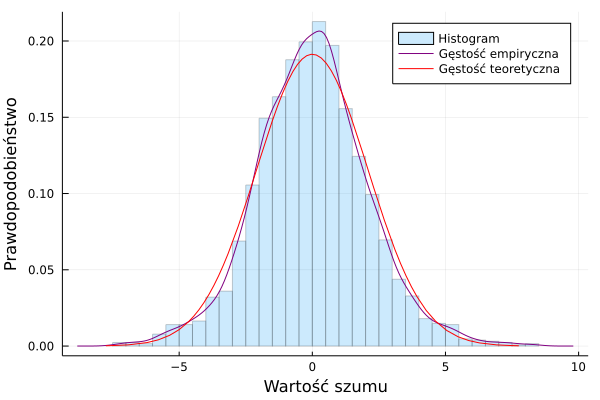

In [277]:
histogram(residua,normed=true,alpha=0.2,label="Histogram")
density!(residua,color="purple",label="Gęstość empiryczna")
plot!(Normal(0,sqrt(4.3478)),color="red",label="Gęstość teoretyczna",ylabel="Prawdopodobieństwo",xlabel="Wartość szumu")


In [278]:
savefig(plot!(),"tex_Maciej/img/density.png")

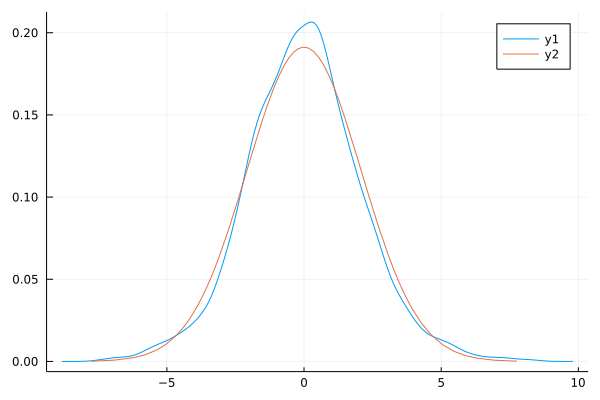

In [279]:
density(residua)
# plot!(Normal(0,sqrt(4.3478)))
plot!(Normal(0,std(residua)))

In [280]:
var(residua)

4.349907301329971

In [281]:
# ecdf_plot(residua)

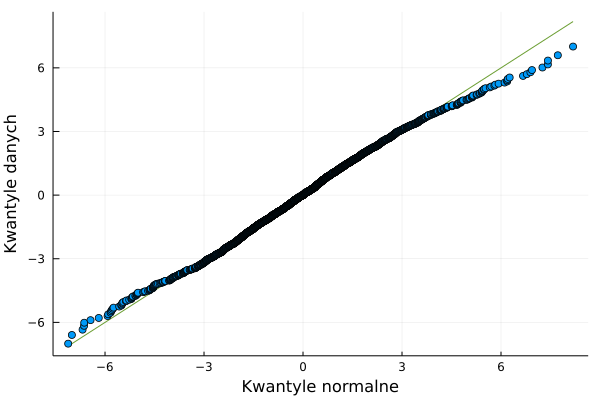

In [282]:
qqplot(residua,Normal(0,sqrt(4.3478)),xlabel="Kwantyle normalne",ylabel="Kwantyle danych")

In [283]:
savefig(plot!(),"tex_Maciej/img/qqplot.png")

In [284]:
OneSampleADTest(residua,Normal(mean(residua),std(residua)))

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0334

Details:
    number of observations:   2557
    sample mean:              0.0007919156167252843
    sample SD:                2.0856431385378396
    A² statistic:             2.830020981780576


In [285]:
ExactOneSampleKSTest(residua, Normal(mean(residua),std(residua)))

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0246638

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0877

Details:
    number of observations:   2557
